In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization Library
import seaborn as sns #visualization Library

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/treadmill-company-dataset/aerofit.txt



- Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. we will Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, we will construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:



### Dataset information
* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week

**Product Portfolio:**

* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

In [45]:
df = pd.read_csv('/kaggle/input/treadmill-company-dataset/aerofit.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [46]:
#shape of the Dataset
df.shape

(180, 9)

## Observations
- Dataset contains 180 records
- Dataset have 8 features

In [47]:
# Checking the Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [48]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

### Univariate Analysis

In [49]:
# Number of Unique Values in each Column

for i in df.columns:
  print(i , ':' , df[i].nunique())


Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


From the above observation, we can conclude that only Income, Age and Miles can be considered as Contineous, rest of the columns though interger/float should be considered as Catergories.

In [50]:
# Checking for the Null Values
# df.isna().sum()

df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

As we can observe there aren't any Missing values in the Dataset.

### Checking the Value Count for Categorical Columns

In [51]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

The Most purchased Product in the dataset is KP281 followed by KP481 and KP781

In [52]:
df['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [53]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

Most of the Users are using it for 3 to 4 Days of the Week.

In [54]:
df['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [55]:
df['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [56]:
df['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

In [92]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

Most Customers are Male

In [57]:
# Correlating between the columns of Dataset for a broader perspective.
# Creating a copy of dataframe

df_copy = df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1,0], inplace= True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0,1], inplace= True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0,1,2], inplace= True)

df_copy.corr()
#ignore the Python Warnings

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


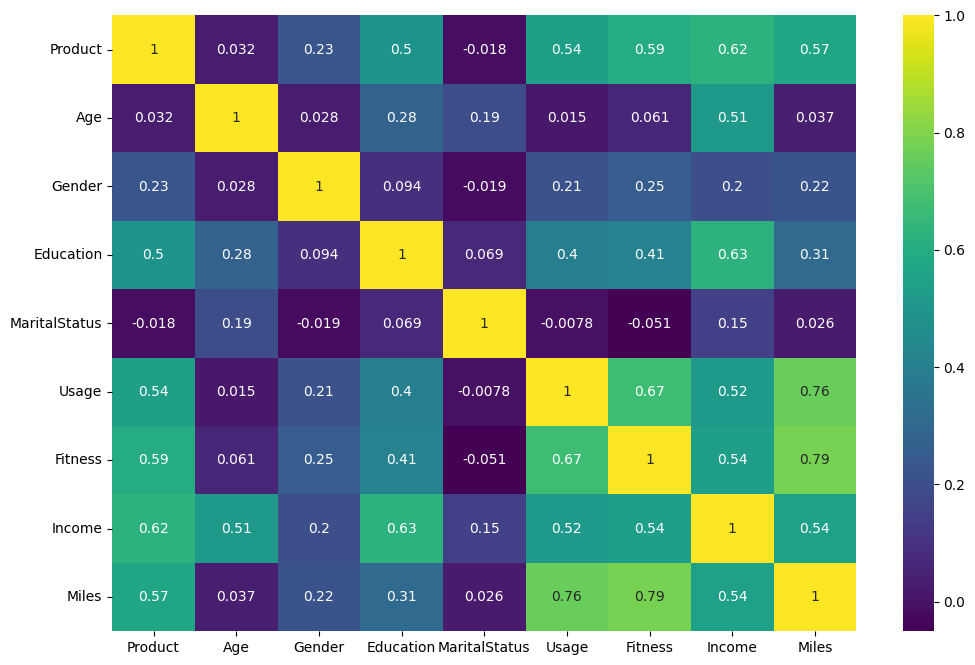

In [58]:
# Correlation plot Above as Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df_copy.corr(), cmap = "viridis", annot= True )
plt.show()

# **Insights from the Heatmap**

**Notewothy Points**
1.   The product treadmill purchased highly correlates with Education, Usage, Fitness, Income and Miles(distance covered).
2.   Age is highly correlated to income(0.51) which definitely seems reasonable.
3.   Gender has some correlation to Usage, Fitness, Income and Miles.
4.   Education is correlated to Age and Miles. It's highly correlated to Income (this is obvious). It's sufficiently correlated to Usage and Fitness too.
5.   Maritial Status has some correlation to Age and Income.
6.   Usage is highly correlated to Fitness, Miles and Income. Its correlated but not much with Education.
7.   Fitness is highly realted with Usage and Miles with is also obvious which is more you use the product the more Fit you become. And Income and Education is correlated.
8.   Income is highly correlated with Age, Education, Usage , Fitness and Miles.
9.   Miles is highly correlated with Usage, Fitness and Income. Its has some correlation with Gender and Education.

**More Observations and Possiblilties:-**



1.   Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.
2.   Also a story which seems reasonable is that Age and Education are indicators of Income which affects the products bought.









**Observing the Outliers of Age, Income and Miles**

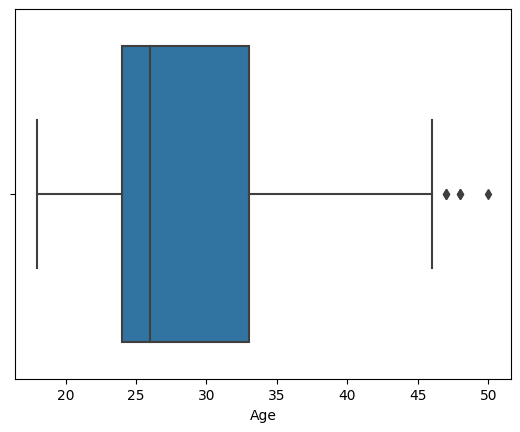

In [59]:
ax = sns.boxplot(x = df['Age'])
plt.show()

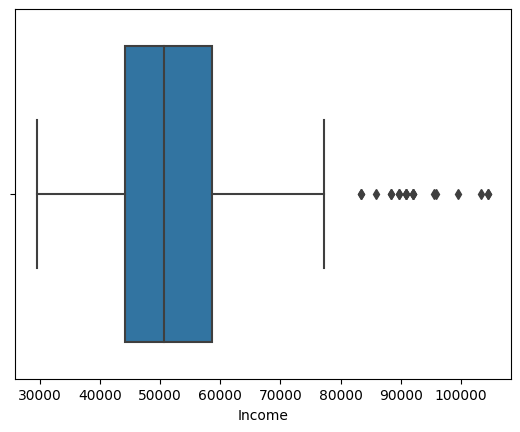

In [60]:
ax = sns.boxplot(x = df['Income'])
plt.show()

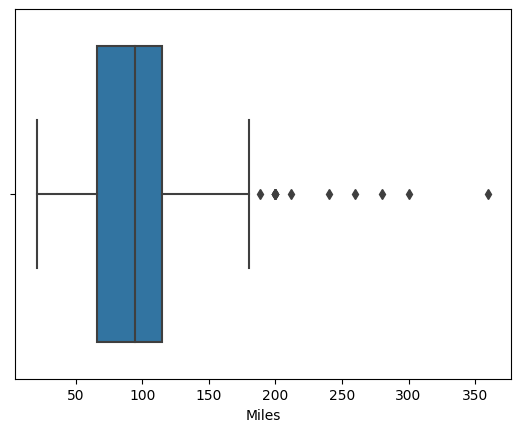

In [61]:
ax = sns.boxplot(x = df['Miles'])
plt.show()

There are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, its foing to be clipped(i.e. -ranges between 5 percentile to 96 percentile).



In [62]:
num_feat = ['Age', 'Income', 'Miles']
for col in num_feat:
  percentiles = df[col].quantile([0.05,0.95]).values
  df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

In [63]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

# Bivariate Analysis

## Scatterplots for Analysis of Continuous Variables

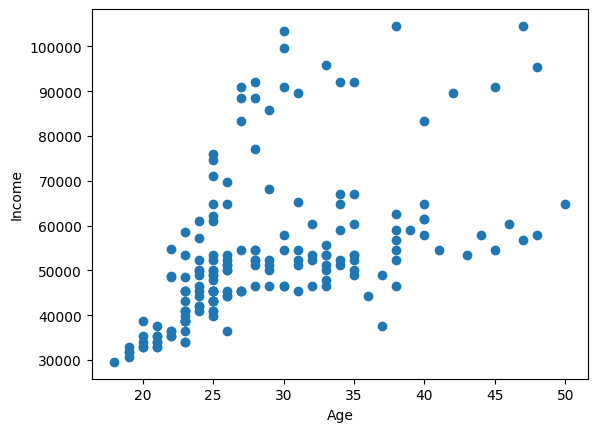

In [64]:
# Obsevrving the Association between Age and Income - 
plt.scatter(df['Age'], df['Income'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

There is a cone like structure inthe ScatterPlot which when goggled comes out to be Heteroscedastic. --> situations where the variance of the residuals is unequal over a range of measured values. When running a regression analysis, heteroskedasticity results in an unequal scatter of the residuals (also known as the error term).

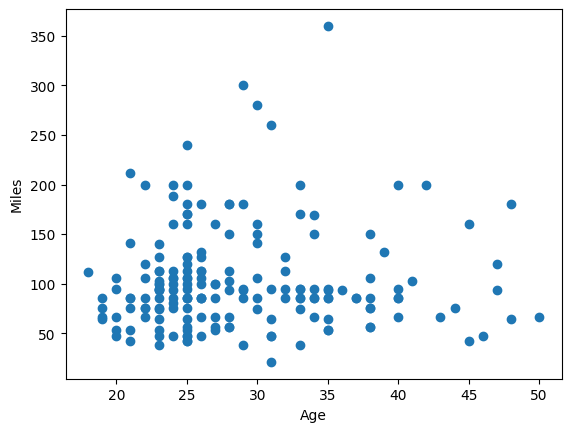

In [65]:
# Obsevrving the Association between Age and Miles - 
plt.scatter(df['Age'], df['Miles'])
plt.xlabel("Age")
plt.ylabel("Miles")
plt.show()

No such significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.

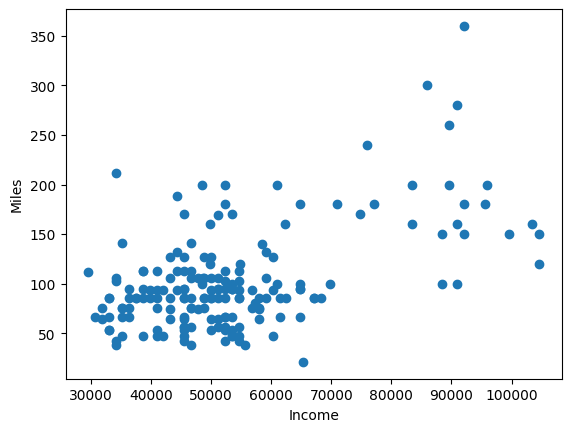

In [66]:
# Obsevrving the Association between Income and Miles - 
plt.scatter(df['Income'], df['Miles'])
plt.xlabel("Income")
plt.ylabel("Miles")
plt.show()

The Miles ran on treadmill increase significantly with income, infact only people having income above 70000 have run over 220 Miles.


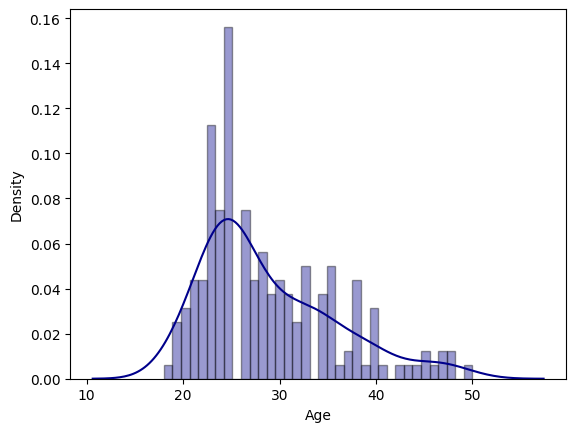

In [67]:
# Observing the Ages to create Bins - 

sns.distplot(df['Age'], hist= True, kde= True,
             bins = int(36), color = 'darkblue',hist_kws={'edgecolor':'black',
                       'linewidth':1})
plt.show()

In [68]:
#create bins on intervals of 5 as per Age gaps ans below 20, above 40->

bins = [-1, 20,25,30,35,40,55]
labels= ['<20','20-25','25-30','30-35','35-40','40+']
df['Age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20
1,KP281,19,Male,15,Single,2,3,31836,75,<20
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20
3,KP281,19,Male,12,Single,3,3,32973,85,<20
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20
5,KP281,20,Female,14,Partnered,3,3,32973,66,<20
6,KP281,21,Female,14,Partnered,3,3,35247,75,20-25
7,KP281,21,Male,13,Single,3,3,32973,85,20-25
8,KP281,21,Male,15,Single,5,4,35247,141,20-25
9,KP281,21,Female,15,Partnered,2,3,37521,85,20-25


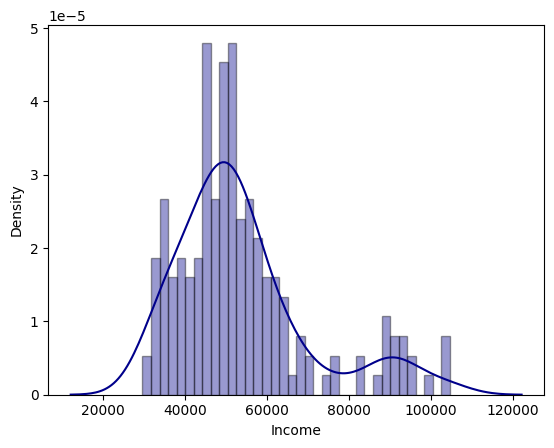

In [69]:
# Observing the income to create Bins - 

sns.distplot(df['Income'], hist= True, kde= True,
             bins = int(36), color = 'darkblue',hist_kws={'edgecolor':'black',
                       'linewidth':1})

plt.show()

In [70]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [71]:
#Create Bins for Incomes-->

bins = [-1, 35000,45000,50000,60000,70000,120000]
labels= ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','120000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000
5,KP281,20,Female,14,Partnered,3,3,32973,66,<20,<35000
6,KP281,21,Female,14,Partnered,3,3,35247,75,20-25,35000-45000
7,KP281,21,Male,13,Single,3,3,32973,85,20-25,<35000
8,KP281,21,Male,15,Single,5,4,35247,141,20-25,35000-45000
9,KP281,21,Female,15,Partnered,2,3,37521,85,20-25,35000-45000


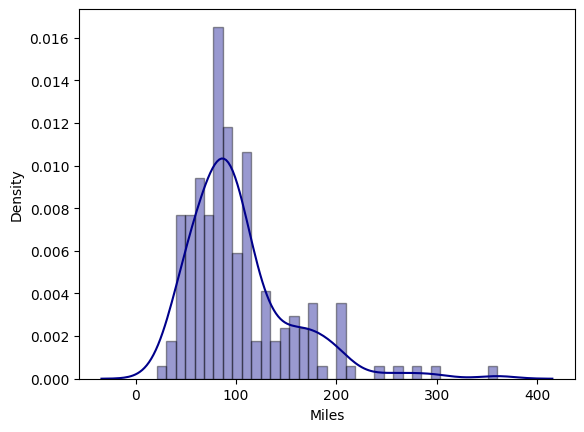

In [72]:
# Observing the Miles to create Bins - 

sns.distplot(df['Miles'], hist= True, kde= True,
             bins = int(36), color = 'darkblue',hist_kws={'edgecolor':'black',
                       'linewidth':1})

plt.show()

In [73]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [74]:
#Create Bins for Miles-->

bins = [-1, 50,100,150,400]
labels= ['<50','50-100','100-150','150+']
df['Miles_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50
5,KP281,20,Female,14,Partnered,3,3,32973,66,<20,<35000,50-100
6,KP281,21,Female,14,Partnered,3,3,35247,75,20-25,35000-45000,50-100
7,KP281,21,Male,13,Single,3,3,32973,85,20-25,<35000,50-100
8,KP281,21,Male,15,Single,5,4,35247,141,20-25,35000-45000,100-150
9,KP281,21,Female,15,Partnered,2,3,37521,85,20-25,35000-45000,50-100


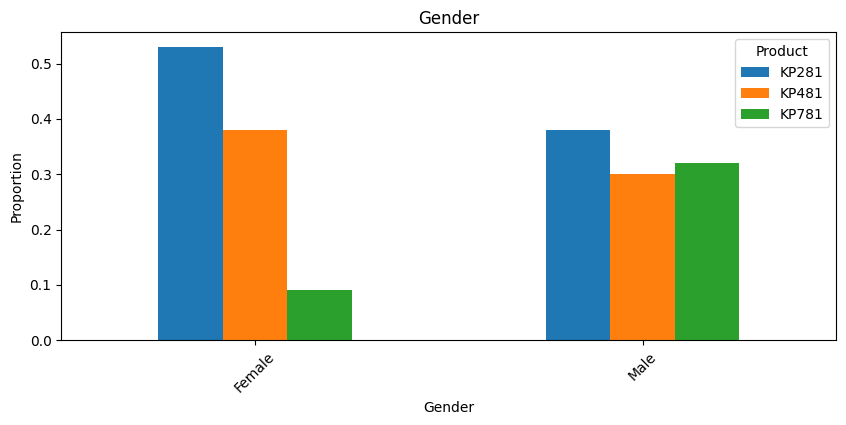

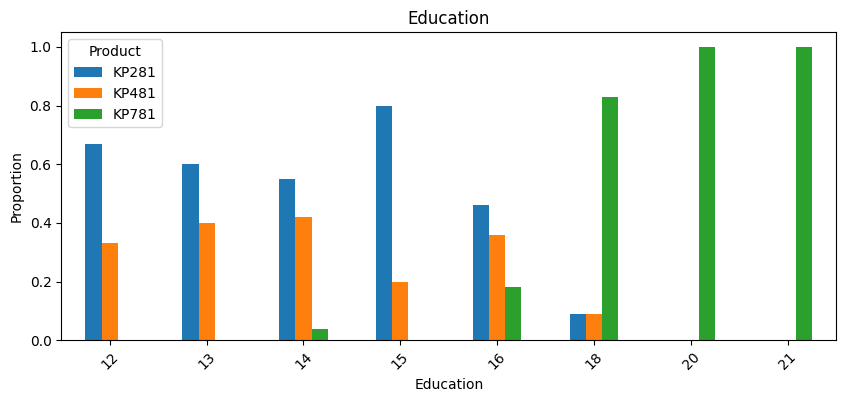

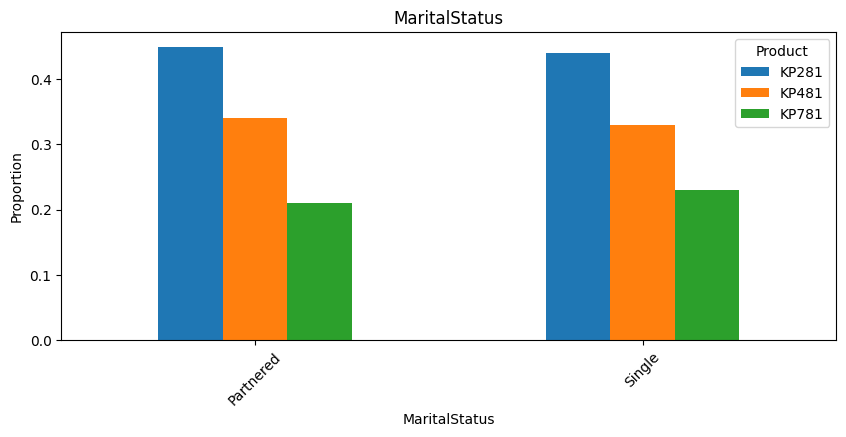

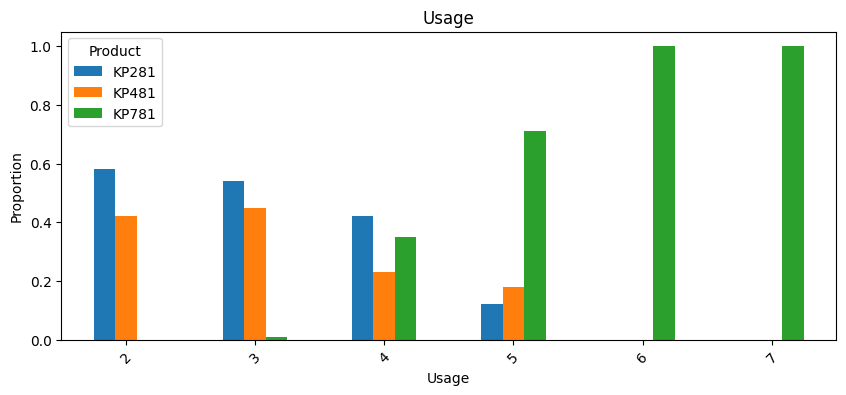

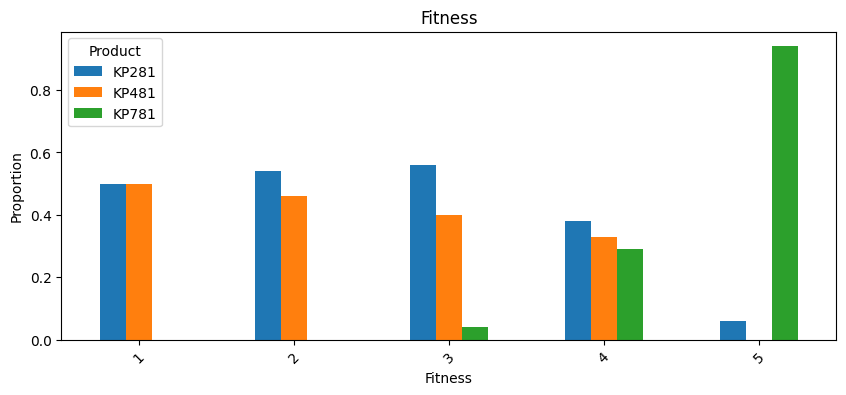

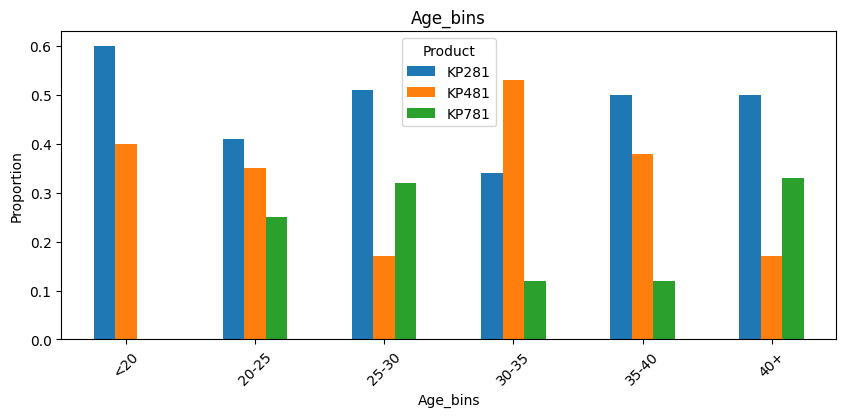

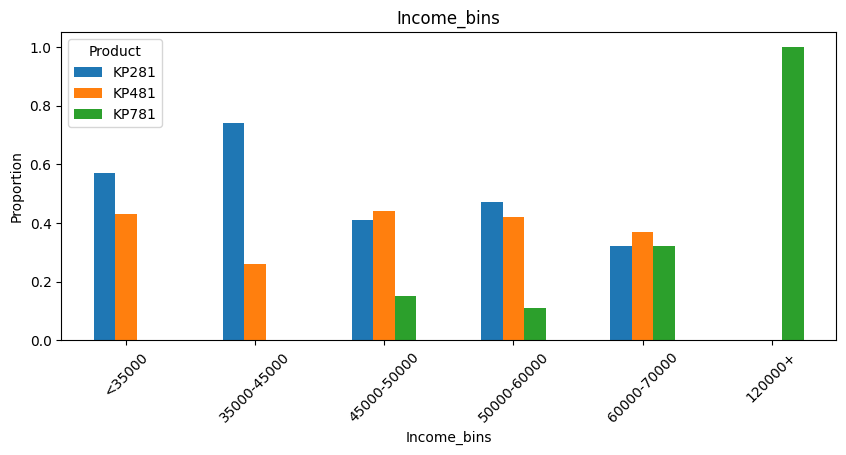

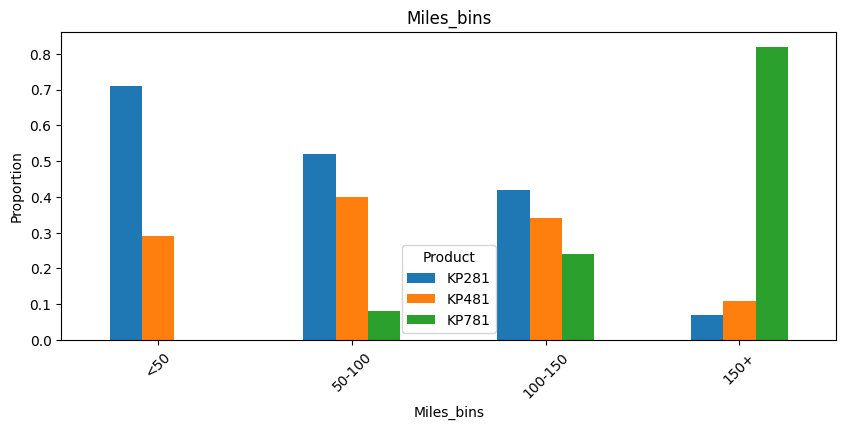

In [75]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Miles_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**

1) Around 55% of women prefer KP281 and only 10% prefer KP781. While around 31% of men prefer KP781.

2) 80% in Education level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

3) Marital Status implies no significant information on the usages of different treadmills.

4) Those who workout 5 to 7 days a week use KP781 while 40% to 60% of those who workout 5 days a week use KP281.

5) 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

6) No one below 20 years of age use KP781, this might be the possibility that below 20 years dont have that much of the Income to spend on KP781(Expensive Model)

7) Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

8) Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

#### Let's deal with Probabilities -

Conditional probabilities - are the probability that an event occurs given that another event has occurred. For example, given that a customer is female, what is the probability she’ll purchase a Mac?

Marginal Probablities - Divide the row or column total by the total sample size. Marginal probabilities are the probabilities that a single event occurs with no regard to other events in the table. These probabilities do not depend on the condition of another outcome.

Probability(Mac) ; Probability(Female)

**Normalize**: Default value is False Normalize by dividing all values by the sum of values:

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.

In [76]:
pd.crosstab(index=df['Gender'] , columns=df['Product'], margins=True )

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [77]:
pd.crosstab(index=df['Gender'] , columns=df['Product'] ,normalize = True, margins=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [78]:
from IPython.display import display
for i in cat_cols:
  print('Table for',str(i),'vs Treadmill Product')
  display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
  print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
120000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Miles_bins vs Treadmill Product


Product,KP281,KP481,KP781
Miles_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


**Brief depiction of Probabilities Inferred from the above tables**

1) In all the tables, one can see the last row named All, it consists of the overall probabilities of purchases of those 3 treadmills, i.e. - Probability of purchase of KP281= 44.44%, KP481= 33.33% and KP781=22.22%

2) P(KP281|Education=12) = 66.66% and P(KP781|Education=18) = 82.6%
   P(KP781|Education=20) = P(KP781|Education=21) = 100%

3) P(KP281|Usage=2) = 57.57%, P(KP781|Usage=6)=P(KP781|Usage=7) = 100%

4) P(KP481|Fitness=2) = 46.15%

5) P(KP481|Age_bins=30-35) = 53.12%

6) P(KP781|Income>70000) = 100% and P(KP481|Income_bins=45000-50000) = 44.11%

7) P(KP281|Mile_bins<50) = 70.5% and  P(KP781|Mile_bins>150)=82.1%


**Till now we've got great insights for the customers peratining to KP781 while clarity regarding KP281 and KP481 seems to be missing**

In [79]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Income_bins,Miles_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,35000-45000,<50


# Multivariate Analysis

## Customer Age vs Income_bins on Gender

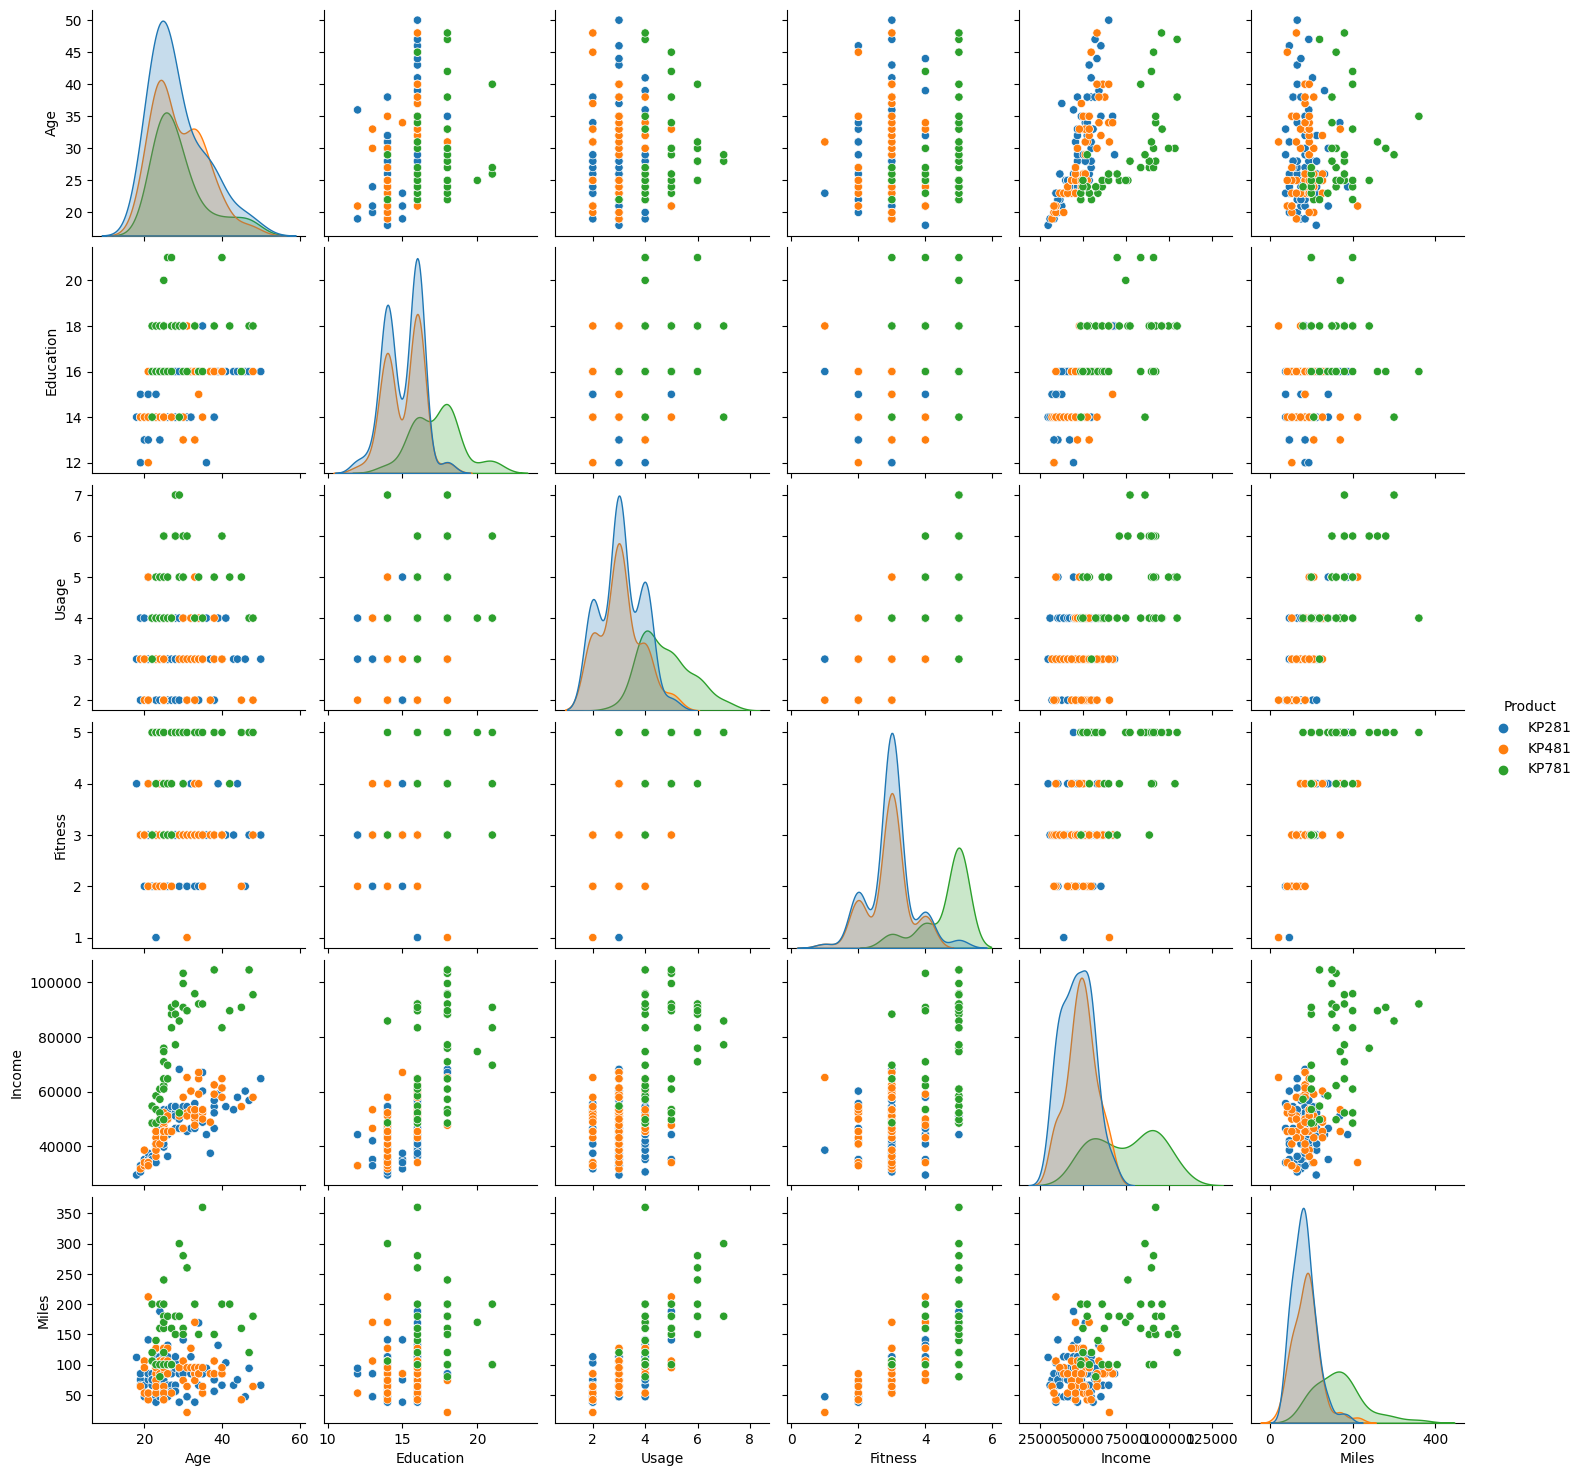

In [93]:
sns.pairplot(df,hue='Product')

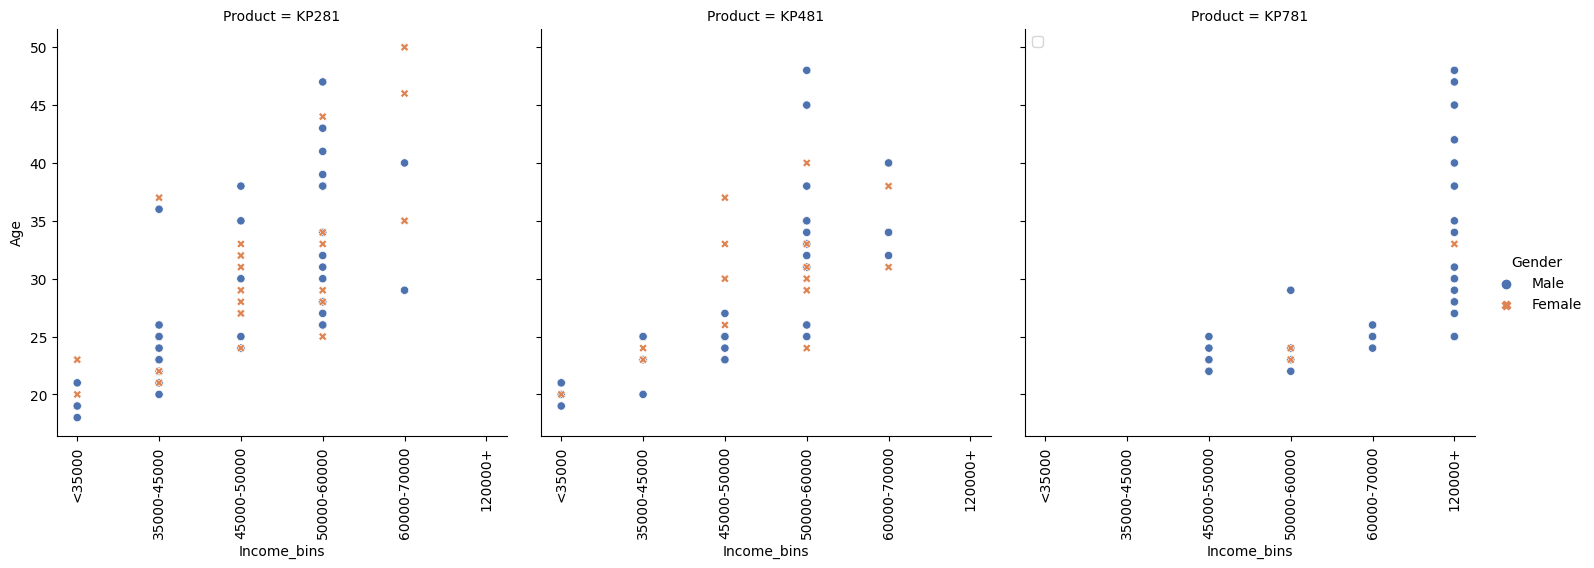

<Figure size 1000x600 with 0 Axes>

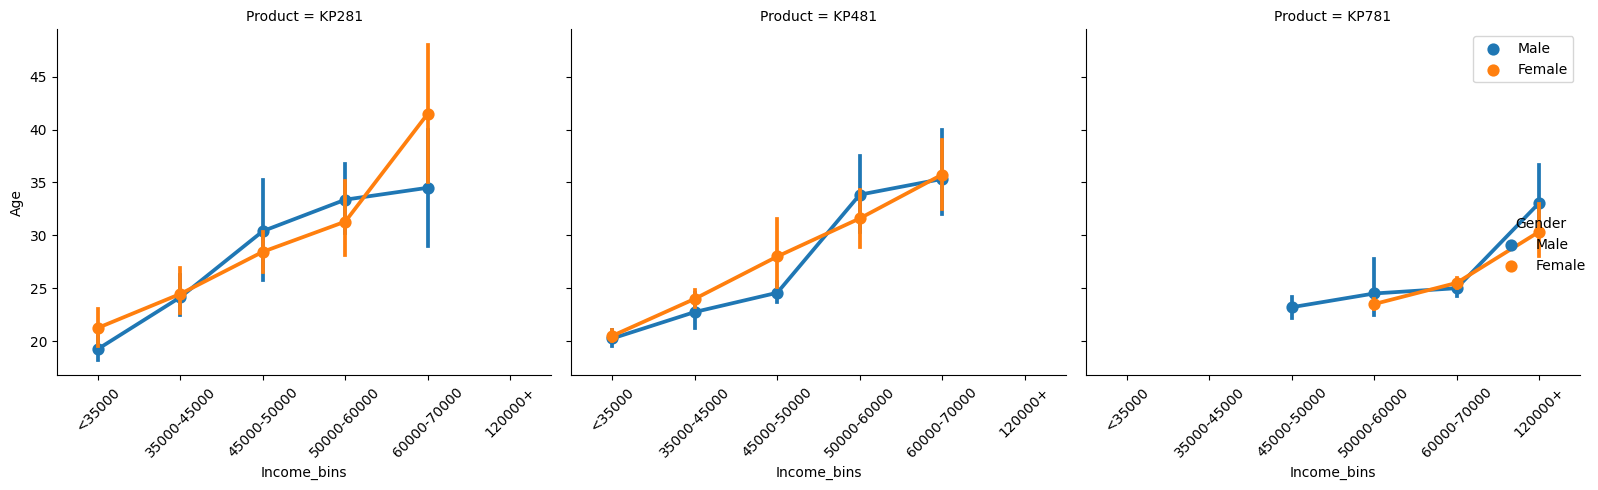

In [91]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Gender', style='Gender', palette="deep", kind="scatter")
plt.legend(loc='upper left')
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

plt.tight_layout()

plot=sns.catplot(x= 'Income_bins', y ='Age',
               hue='Gender',col = 'Product', data = df, kind='point')
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()